Heat Flow
=========

The problems consiste in determining the temperature variation along a
bar of length $l$ at any instant of time, given the initial gradient of
temperature.

![bar](figures/bar.png)
#### A bar with the ends in contact with heat reservoirs.

The problem is described by the “Heat Equation” that can be derived as
follows:

At any instant of time, the heat flow through the bar equals the
variatioon of energy inside the bar:
$$\mathrm{Heat\,\,Flow=Variation\,\,of\,\,internal\,\,energy}$$ or
$$\nabla \cdot Q = -\frac{dE}{dt}.$$ The variation of the internal
energy is given by the body’s ability to store heat by raising its
temperature: $$\frac{dE}{dt} = \rho c \frac{dT}{dt},$$ where $\rho$ is
the density, and $c$ is the specific heat of the material. Fourier’s Law
of heat conduction states that $$Q=-K\nabla T,$$ where $K$ is the
thermal conductivity. Hence, we obtain
$$\nabla \cdot \left( K \nabla T\right) = \rho c \frac{dT}{dt},$$ or
$$\frac{dT}{dt}=\alpha \nabla^2T,$$ with $\alpha = K/(c\rho)$. In 1d
this equation is written
$$\frac{\partial T(x,t)}{\partial t} = \alpha \frac{\partial ^2T}{\partial x^2}.
$$ We must solve this equation given the initial
condition $$T(x,t=0) = f(x)\,\,\,\mathrm{(initial\,\,condition)}
$$ and the boundary condition $$\begin{eqnarray}
T(x=0,t) &=& T_1, \\
T(x=l,t) &=& T_2.
\end{eqnarray}$$

Finite differences solution
---------------------------

![heat](figures/heat.png)
#### The finite differences algorithm for the heat equation.


The numerical solution is based on converting the differential equation
into an approximate finite-diffence one. Following a derivation similar
to the one we used for the wave equation we approximate the derivatives
by finite differences: $$\begin{eqnarray}
\frac{\partial T}{\partial t} &=& \frac{T(x,t+\Delta t)-T(x,t)}{\Delta t}, \\
\frac{\partial^2 T}{\partial x^2} &=& \frac{T(x+\Delta x,t)+T(x-\Delta x,t)-
2T(x,t)}{(\Delta x)^2}.\end{eqnarray}$$

Replacing in \[heat\_1d\] we obtain the discrete equivalent:
$$T(x,t+\Delta t)=T(x,t)+\frac{\alpha}{C}\left[T(x+\Delta x,t)+T(x-\Delta x,t)
-2T(x,t) \right], 
$$ with the constant $C=(\Delta x)^2/\Delta t$.
We see in Fig. \[heat\_dif\] that the temperature at the point
$(x, t+\Delta t)$ is determined by the temperatures at three points of
the previous time step. The boundary conditions impose fixed values
along the perimeter. The initial condition \[heat\_ini\] is used to
generate the temperature gradient at time $t=\Delta t$, and the equation
\[heat1d\_discrete\] is used for the time evolution.

The stability condition for a numerical solution is iven by
$$\alpha\frac{\Delta t}{(\Delta x)^2} \leq \frac{1}{4}.$$ This means
that if we make the time step smaller we improve convergence, but if we
decrease the space step without a simultaneous quadratic increase of the
time step, we worsen it.

### Exercise 6.1: Finite differences program 

Solve the temperature distribution within an iron bar of length $l=50$cm
with the boundary conditions $$T(x=0,t)=T(x=l,t)=0,$$ and initial
conditions $$T(x,t=0)=100^{\circ}\mathrm{C}.$$ The corresponding
constants for iron are:
$$c=0.113 \mathrm{cal/(g^{\circ} C)},\,\, K=0.12 \mathrm{cal/(sg^{\circ}C)},
\,\,\rho=7.8 \mathrm{g/cc}.$$

1.  Write the program to solve the heat flow equation using the finite
    differences method

2.  Plot the temperature gradient along the bar at different instants
    of time. Use 100 space divissions for the calculation. Choose an
    appropiate time step such that the numerical solution is stable.
    Check that the temperature diverges with time is the constant $c$ is
    made larger that $0.5$.

3.  Repeat the calculation for aluminum, $c=0.217cal/(g^{\circ}C)$,
    $K=0.49
    cal/(g^{\circ}C)$, $\rho=2.7g/cc$. Note that the stability condition
    requires you to change the size of the time step.

4.  Analize and compare the results for both materials. The shape of the
    curves may be the same but not the scale. Which bar cools faster and
    why?

5.  Pick a sinusoidal initial gradient: $$T(x,t=0)=\sin{(\pi x/l)}.$$
    Compare with the analytic solution
    $$T(x,t)=\sin{(\frac{\pi x}{l})}e^{\pi^2\alpha t/l^2}.$$



0.0871341048332


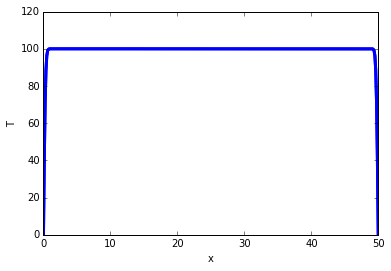

In [21]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot
import matplotlib.animation as animation
from JSAnimation.IPython_display import display_animation

K = 0.12
c = 0.113
rho = 7.8
alpha = K/c/rho

l = 50    #length of the string
dx = 0.125  # space step
nx = int(l/dx)  # number of points in space
x = np.arange(0,l+dx,dx) # the +1 is necessary to store the value at l
dt = 0.01
C = dx**2/dt
r = alpha/C

print r

t0 = np.zeros(nx+1)
t1 = np.zeros(nx+1) # these arrays will contain the new displacements at t, and t+delta

#Initial conditions
t0[:] = 100.
t0[0] = 0.
t0[nx] = 0.


fig = pyplot.figure()
ax = pyplot.axes(xlim=(0, l), ylim=(0, 120), xlabel='x', ylabel='T')
points, = ax.plot([], [], marker='', linestyle='-', lw=3)

def evolve(i):
    global t0, t1

    for ix in range(1,nx):
        t1[ix] = t0[ix] + r*(t0[ix+1]+t0[ix-1]-2*t0[ix])  

    points.set_data(x, t1)

    for ix in range(nx):
        t0[ix] = t1[ix]

    return points


#anim = animation.FuncAnimation(fig, evolve, frames = 2000, interval=10)

#display_animation(anim, default_mode='once')

for i in range(20):
    evolve(i)   
pyplot.plot(x, t0, color='blue', ls='-', lw=3);


#### Challenge 6.1:

Solve Exercise 6.2, part 5)

### Exercise 6.2: Two bars in contact 

Two identical bars, 25cm long each, are incontact. One bar is initially
at $50^{\circ}C$, and the other at $100^{\circ}C$. The free ends are
kept at $0^{\circ}C$. Calculate and plot the temperature distribution as
a function of time.


#### Challenge 6.2:

Modify the initial conditions in the program to solve Exercise 6.2